In [1]:
import define_transformations_afolu as dta
import define_transformations_circular_economy as dtc
import define_transformations_energy as dte
import define_transformations_ippu as dti
import define_transformations_integrated as dtr

import os, os.path
import numpy as np
import pandas as pd
#from model_attributes import *
import model_attributes as ma
import model_afolu as mafl
import model_ippu as mi
import model_circular_economy as mc
import model_electricity as ml
import model_energy as me
import model_socioeconomic as se
import setup_analysis as sa
import sisepuede_data_api as api
import sisepuede_models as sm
import support_classes as sc
import support_functions as sf
import importlib
import time
import warnings
import matplotlib.pyplot as plt
from typing import Union
import inspect
import ingestion as ing
import logging
from sisepuede_file_structure import *
import transformations_base_afolu as tba
import transformations_base_circular_economy as tbc
import transformations_base_energy as tbe
import transformations_base_general as tbg
import transformations_base_ippu as tbi


importlib.reload(ma)
importlib.reload(sa)
importlib.reload(sf)
importlib.reload(mafl)
importlib.reload(mc)
importlib.reload(mi)
importlib.reload(me)
importlib.reload(se)
importlib.reload(tbc)
importlib.reload(tbe)


import sisepuede as ssp


def _setup_logger(namespace: str, fn_out: Union[str, None] = None) -> None:
    global logger
    
    format_str = "%(asctime)s - %(levelname)s - %(message)s"
    # configure
    if fn_out is not None:
        logging.basicConfig(
            filename = fn_out,
            filemode = "w",
            format = format_str,
            level = logging.DEBUG
        )
    else:
        logging.basicConfig(
            format = format_str,
            level = logging.DEBUG
        )
        
    logger = logging.getLogger(namespace)
    # create console handler and set level to debug
    ch = logging.StreamHandler()
    ch.setLevel(logging.DEBUG)
    # create formatter
    formatter = logging.Formatter(format_str)
    # add formatter to ch
    ch.setFormatter(formatter)
    # add ch to logger
    logger.addHandler(ch)

    return logger

_setup_logger(__name__, os.path.join(os.getcwd(), "log_build_sisepuede_transformations.log"))


/Users/jsyme/Documents/Projects/git_jbus/sisepuede/python/model_attributes.py:2635: UserWarning: Invalid subsector attribute 'key_varreqs_partial'. Valid return type values are:'pycategory_primary', 'abv_subsector', 'sector', 'abv_sector', 'key_varreqs_all'
  warnings.warn(f"Invalid subsector attribute '{return_type}'. Valid return type values are:{valid_rts}")
/Users/jsyme/Documents/Projects/git_jbus/sisepuede/python/model_attributes.py:2392: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for desig, df in df_by_designation:
/Users/jsyme/Documents/Projects/git_jbus/sisepuede/python/model_attributes.py:2635: UserWarning: Invalid subsector attribute 'key_varreqs_partial'. Valid return type values are:'pycategory_primary', 'abv_subsector', 'sector', 'abv_sector', 'key_varreqs_all'
  warnings.warn(f"Invalid subsector a

<Logger __main__ (DEBUG)>

# Use the TransformationsIntegrated class to build input templates

- allows to specify any strategies/regions for which to build templates

- writes in-line to Excel templates

- for all strategies, about 5-min per (can and will improve this runtime)

- use `transformations_integrated.build_strategies_to_templates()` to build (docstring included with `?`)


**NOTE**: The `TransformationsIntegrated` class will instantiate a new SISEPUEDE AnalysisID, but the id does not correspond with a directory or any model runs. Ignore it

# NOTE TO JAMES:
- FIX ERROR WHERE transformations_integrated CANNOT INSTANTIATE A TEMPLATE IF IT DOESN'T EXIST
- Should be able to initialize a template with base_input_database_demo or input_template

In [3]:
importlib.reload(sf)
importlib.reload(tba)
importlib.reload(dta)
importlib.reload(dtr)

regions_lac = [
    "argentina",
    "bahamas",
    "barbados",
    "belize",
    "bolivia",
    "brazil",
    "chile",
    "colombia",
    "costa_rica",
    "dominican_republic",
    "ecuador",
    "el_salvador",
    "guatemala",
    "guyana",
    "haiti",
    "honduras",
    "jamaica",
    "mexico",
    "nicaragua",
    "panama",
    "paraguay",
    "peru",
    "suriname",
    "trinidad_and_tobago",
    "uruguay",
    "venezuela"
]



year_0_ramp = 2025
dir_calibs = "/Users/jsyme/Documents/Projects/FY21/SWCHE131_1000/Data/calibrated_input_files_from_edmundo"
fp_inputs = os.path.join(dir_calibs, "input_all_sectors.csv")
df_input = pd.read_csv(fp_inputs)
field_region = "nation"

regions_run = [
    x for x in sorted(regions_lac) if x in list(df_input[field_region].unique())
]

# reduce inputs
df_input = df_input[
    df_input[field_region].isin(regions_run)
].reset_index(drop = True)

warnings.filterwarnings("ignore")

if True:
    # set some parameters (WILL SET TO READ FROM A CONFIG OR STRATEGY DEFINITION FILE)
    dict_config_te = {
        "categories_entc_max_investment_ramp": [
            "pp_hydropower",
            "pp_nuclear"
        ],
        "categories_entc_renewable": [
            "pp_geothermal",
            "pp_hydropower",
            "pp_ocean",
            "pp_solar",
            "pp_wind"
        ],
        "categories_inen_high_heat": [
            "cement", 
            "chemicals", 
            "glass", 
            "lime_and_carbonite", 
            "metals"
        ],
        "dict_entc_renewable_target_msp": {
            "pp_solar": 0.15,
            "pp_geothermal": 0.1,
            "pp_wind": 0.15
        },
        "frac_inen_high_temp_elec_hydg": 0.5*0.45,
        "frac_inen_low_temp_elec": 0.95*0.45,
        "n_tp_ramp": None,
        "vir_renewable_cap_delta_frac": 0.01,
        "vir_renewable_cap_max_frac": 0.05,
        "year_0_ramp": year_0_ramp
    }



    transformations_integrated = dtr.TransformationsIntegrated(
        dict_config_te,
        df_input = df_input,
        field_region = field_region,
        logger = logger,
        regions = regions_run,
    )



2023-07-18 03:06:35,718 - INFO - Successfully initialized Analysis ID 'sisepuede_run_2023-07-18T03:06:35.718305'
2023-07-18 03:06:35,719 - INFO - Verification of SISEPUEDE directory structure completed successfully with 0 errors.
2023-07-18 03:06:36,906 - INFO - NemoMod reference file checks completed successfully.
2023-07-18 03:06:36,907 - INFO - Successfully initialized SISEPUEDEFileStructure.
2023-07-18 03:06:36,910 - INFO - Initializing BaseInputDatabase


In [3]:
reg = sc.Regions(sa.model_attributes)
",".join([reg.return_region_or_iso(x, return_type = "iso") for x in regions_run])
          
          
          
          

'ARG,BOL,BRA,CHL,COL,CRI,DOM,ECU,SLV,GTM,HND,JAM,MEX,NIC,PAN,PRY,PER,URY'

In [146]:
df_regions_run = pd.DataFrame({regions.key: regions_run})
df_regions_run.to_csv(
    os.path.join(sa.dir_tmp, "regions_run.csv"),
    index = None,
    encoding = "UTF-8"
)

In [ ]:
def get_strategies_from_codes(
    strategy_codes: Union[List[str], str],
) -> Union[List[int], None]:
    """
    Map codes to id as input
    """
    attr_strat = sa.model_attributes.dict_attributes.get("dim_strategy_id")
    dict_map = attr_strat.field_maps.get(f"strategy_code_to_{attr_strat.key}")
    
    # check specification of codes
    strategy_codes = (
        [strategy_codes] 
        if isinstance(strategy_codes, str)
        else (
            strategy_codes
            if sf.islistlike(strategy_codes)
            else None
        )
    )
    
    if strategy_codes is None:
        return None
    
    # get ids to build
    strategies_build = [dict_map.get(x) for x in strategy_codes]
    strategies_build = [x for x in strategies_build if x is not None]
    out = (
        None
        if len(strategies_build) == 0
        else strategies_build
    )
    
    return out



    
strategy_codes_keep = [
    "BASE",
    "LNDU:PLUR",
    "PFLO:BETTER_BASE",
    "PFLO:CHANGE_CONSUMPTION",
    "PFLO:SUPPLY_SIDE_TECH",
    "PFLO:ALL_NO_STOPPING_DEFORESTATION_PLUR",
    "PFLO:ALL_PLUR"
]
strategies_keep = get_strategies_from_codes(strategy_codes_keep)

if True:
    transformations_integrated.build_strategies_to_templates(
        strategies = strategies_keep
    )

   

2023-07-18 03:07:10,737 - INFO - Starting build of 6 strategies in 18 regions...
2023-07-18 03:07:10,741 - INFO - Starting build for region argentina
2023-07-18 03:07:10,753 - INFO - 	Successfully built transformation strategy_id = 1014 ('LNDU: Partial land use reallocation') in 0.01 seconds.
2023-07-18 03:07:13,761 - INFO - 	Successfully built transformation strategy_id = 5001 ('PFLO: Better baseline') in 0.16 seconds.
2023-07-18 03:07:16,887 - INFO - 	Successfully built transformation strategy_id = 5004 ('PFLO: Change consumer behavior') in 0.14 seconds.
2023-07-18 03:07:20,739 - INFO - 	Successfully built transformation strategy_id = 5006 ('PFLO: Supply side technologies and transformations') in 0.78 seconds.
2023-07-18 03:07:25,038 - INFO - 	Successfully built transformation strategy_id = 5007 ('PFLO: All transformations without stopping deforestation and partial land use reallocation') in 1.06 seconds.
2023-07-18 03:07:29,139 - INFO - 	Successfully built transformation strategy_id

# Option to run SISEPUEDE

In [4]:

import sisepuede as ssp
"""
fn_log = os.path.join(os.getcwd(), "log_sisepuede.log")
os.remove(fn_log) if os.path.exists(fn_log) else None

def _setup_logger(namespace: str, fn_out: Union[str, None] = None) -> None:
    global logger
    
    format_str = "%(asctime)s - %(levelname)s - %(message)s"
    # configure
    if fn_out is not None:
        logging.basicConfig(
            filename = fn_out,
            filemode = "w",
            format = format_str,
            level = logging.DEBUG
        )
    else:
        logging.basicConfig(
            format = format_str,
            level = logging.DEBUG
        )
        
    logger = logging.getLogger(namespace)
    # create console handler and set level to debug
    ch = logging.StreamHandler()
    ch.setLevel(logging.DEBUG)
    # create formatter
    formatter = logging.Formatter(format_str)
    # add formatter to ch
    ch.setFormatter(formatter)
    # add ch to logger
    logger.addHandler(ch)

    return logger

_setup_logger(__name__, fn_log)
""";

sisepuede = ssp.SISEPUEDE(
    "calibrated", 
    logger = logger,
    #n_trials = 1000,
    #id_str = "sisepuede_run_2023-07-11T14:30:38.534039",#id_str = "sisepuede_run_2023-06-13T00:55:37.051768",
    regions = ["brazil"]#regions_run#["brazil", "dominican_republic", "chile", "ecuador", "mexico"]
)






# STRATS TO RUN

attr_strat = sisepuede.model_attributes.dict_attributes.get("dim_strategy_id")
dict_code_to_id = attr_strat.field_maps.get(f"strategy_code_to_{attr_strat.key}")
strat_codes_ignore = [
    # AFOLU
    "LNDU:INC_LAND_REHABILITIATION",
    "LSMM:INC_MANAGEMENT_CATTLE_PIGS",
    "LSMM:INC_MANAGEMENT_OTHER",
    "LSMM:INC_MANAGEMENT_POULTRY",
    "LSMM:INC_CAPTURE_BIOGAS",
    "TRWW:INC_COMPLIANCE_SEPTIC",
    "IPPU:DEC_OTHER_FCS",
    "IPPU:DEC_HFCS",
    "IPPU:DEC_PFCS",
    
    # ENERGY
    "TRNS:BUNDLE_DEMAND_MANAGEMENT",
    "TRNS:BUNDLE_DEMAND_MANAGEMENT_REP",
    "TRNS:BUNDLE_EFFICIENCY",
    "TRNS:BUNDLE_EFFICIENCY_REP",
    "TRNS:BUNDLE_FUEL_SWITCH",
    "TRNS:BUNDLE_FUEL_SWITCH_REP",
    "TRNS:BUNDLE_MODE_SHIFT",
    "TRNS:BUNDLE_MODE_SHIFT_REP"
]
strat_ids_drop = [
    dict_code_to_id.get(x) for x in strat_codes_ignore
]
strats_run = [x for x in attr_strat.key_values if x not in strat_ids_drop]




2023-07-17 00:54:04,014 - INFO - Successfully initialized SISEPUEDEFileStructure.
2023-07-17 00:54:04,018 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2023-07-17 00:54:04,019 - INFO - 	Setting export engine to 'sqlite'.
2023-07-17 00:54:04,038 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2023-07-17 00:54:04,039 - INFO - Successfully instantiated table ANALYSIS_METADATA
2023-07-17 00:54:04,041 - WARNING - No index fields found in ATTRIBUTE_DESIGN. Initializing index fields.
2023-07-17 00:54:04,042 - INFO - Successfully instantiated table ATTRIBUTE_DESIGN
2023-07-17 00:54:04,044 - WARNING - No index fields found in ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES. Initializing index fields.
2023-07-17 00:54:04,046 - INFO - Successfully instantiated table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES
2023-07-17 00:54:04,048 - WARNING - No index

In [29]:
"""
##  SOME IterativeDatabaseTable THINGS

query = f"select * from {tab_output.table_name} limit 0;"
with tab_output.engine.connect() as con:
    df_columns = pd.read_sql_query(query, con)
    
    
for k in tab_output.columns:
    w = np.where(np.array(tab_output.columns) == k)[0]
    if len(w) > 1:
        print(k)

tab_output = sisepuede.database.db.dict_iterative_database_tables.get("MODEL_OUTPUT")
tab_output._initialize_table() # sispuede randomly started failing at some points
""";

In [5]:

dict_filt = {
    "future_id": [0, 1],
    "design_id": [0], 
    "strategy_id": [1014, 5008]
}


dict_primary_keys_out = sisepuede(
    dict_filt,
    chunk_size = 2,
    reinitialize_output_table_on_verification_failure = True,
    regions = ["brazil"],
    thresholds = (10**(-5), 10**4.5),
)


2023-07-17 00:56:43,178 - INFO - 
***	STARTING REGION brazil	***

2023-07-17 00:56:44,631 - INFO - Trying run primary_id = 14014 in region brazil
2023-07-17 00:56:44,633 - INFO - Running AFOLU model
2023-07-17 00:56:45,128 - INFO - AFOLU model run successfully completed
2023-07-17 00:56:45,130 - INFO - Running CircularEconomy model
2023-07-17 00:56:45,261 - INFO - CircularEconomy model run successfully completed
2023-07-17 00:56:45,262 - INFO - Running IPPU model
2023-07-17 00:56:45,451 - INFO - IPPU model run successfully completed
2023-07-17 00:56:45,451 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-07-17 00:56:45,496 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-07-17 00:56:45,735 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-07-17 00:56:45,735 - INFO - Running Energy model (Electricity and Fuel Production: tryi

2023-17-Jul 00:56:46.633 Opened SQLite database at /Users/jsyme/Documents/Projects/git_jbus/sisepuede/tmp/nemomod_intermediate_database.sqlite.
2023-17-Jul 00:56:47.004 Added NEMO structure to SQLite database at /Users/jsyme/Documents/Projects/git_jbus/sisepuede/tmp/nemomod_intermediate_database.sqlite.
Set parameter TimeLimit to value 900


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/d2ky8/src/scenario_calculation.jl:6181


2023-17-Jul 00:57:19.300 Started modeling scenario.
2023-17-Jul 00:59:03.403 Finished modeling scenario.


2023-07-17 00:59:03,901 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-07-17 00:59:03,933 - INFO - ElectricEnergy model run successfully completed
2023-07-17 00:59:03,934 - INFO - Running Energy (Fugitive Emissions)
2023-07-17 00:59:04,034 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-07-17 00:59:04,035 - INFO - Appending Socioeconomic outputs
2023-07-17 00:59:04,053 - INFO - Socioeconomic outputs successfully appended.
2023-07-17 00:59:04,070 - INFO - Model run for primary_id = 14014 successfully completed in 139.44 seconds (n_tries = 1).
2023-07-17 00:59:04,142 - INFO - Trying run primary_id = 125125 in region brazil
2023-07-17 00:59:04,143 - INFO - Running AFOLU model
2023-07-17 00:59:04,515 - INFO - AFOLU model run successfully completed
2023-07-17 00:59:04,516 - INFO - Running CircularEconomy model
2023-07-17 00:59:04,625 - INFO - CircularEconomy model run successfully completed
2023-07-17 00:59:04,626 - IN

Set parameter TimeLimit to value 900
2023-17-Jul 00:59:07.932 Started modeling scenario.
2023-17-Jul 01:00:32.825 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/d2ky8/src/scenario_calculation.jl:6181
2023-07-17 01:00:33,237 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-07-17 01:00:33,271 - INFO - ElectricEnergy model run successfully completed
2023-07-17 01:00:33,272 - INFO - Running Energy (Fugitive Emissions)
2023-07-17 01:00:33,363 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-07-17 01:00:33,364 - INFO - Appending Socioeconomic outputs
2023-07-17 01:00:33,379 - INFO - Socioeconomic outputs successfully appended.
2023-07-17 01:00:33,385 - INFO - Model run for primary_id = 125125 successfully completed in 89.24 seconds (n_tries = 1).
2023-07-17 01:00:34,253 - INFO - Table MODEL_OUTPUT successfully written to database.
2023-07-17 01:00:35,382 - INFO - Trying run primary_id = 14015 in region brazil
2023-07-17 0

Set parameter TimeLimit to value 900


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/d2ky8/src/scenario_calculation.jl:6181


2023-17-Jul 01:00:38.600 Started modeling scenario.
2023-17-Jul 01:02:02.075 Finished modeling scenario.


2023-07-17 01:02:02,502 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-07-17 01:02:02,529 - INFO - ElectricEnergy model run successfully completed
2023-07-17 01:02:02,529 - INFO - Running Energy (Fugitive Emissions)
2023-07-17 01:02:02,681 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-07-17 01:02:02,682 - INFO - Appending Socioeconomic outputs
2023-07-17 01:02:02,725 - INFO - Socioeconomic outputs successfully appended.
2023-07-17 01:02:02,734 - INFO - Model run for primary_id = 14015 successfully completed in 87.35 seconds (n_tries = 1).
2023-07-17 01:02:02,823 - INFO - Trying run primary_id = 125126 in region brazil
2023-07-17 01:02:02,824 - INFO - Running AFOLU model
2023-07-17 01:02:03,352 - INFO - AFOLU model run successfully completed
2023-07-17 01:02:03,352 - INFO - Running CircularEconomy model
2023-07-17 01:02:03,535 - INFO - CircularEconomy model run successfully completed
2023-07-17 01:02:03,536 - INF

Set parameter TimeLimit to value 900
2023-17-Jul 01:02:07.920 Started modeling scenario.
2023-17-Jul 01:03:35.121 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/d2ky8/src/scenario_calculation.jl:6181
2023-07-17 01:03:35,607 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-07-17 01:03:35,647 - INFO - ElectricEnergy model run successfully completed
2023-07-17 01:03:35,647 - INFO - Running Energy (Fugitive Emissions)
2023-07-17 01:03:35,803 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-07-17 01:03:35,804 - INFO - Appending Socioeconomic outputs
2023-07-17 01:03:35,847 - INFO - Socioeconomic outputs successfully appended.
2023-07-17 01:03:35,855 - INFO - Model run for primary_id = 125126 successfully completed in 93.03 seconds (n_tries = 1).
2023-07-17 01:03:36,574 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-07-17 01:03:36,575 - INFO - 
***	 REGION brazil COMPLETE	***

2023-07-17 01:03:36,596 

In [30]:
len(set(sisepuede.database.db.dict_iterative_database_tables.get("MODEL_OUTPUT").columns))
fp = "/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/out/sisepuede_run_2023-07-08T01;34;53.827024/sisepuede_run_2023-07-08T01;34;53.827024_output_database.sqlite"

engine = sqlalchemy.create_engine(f"sqlite:///{fp}")


In [110]:
fp = "/Users/jsyme/Documents/Projects/git_jbus/sisepuede/tmp/nemomod_intermediate_database_ORIG.sqlite"
engine_orig = sqlalchemy.create_engine(f"sqlite:///{fp}")

In [113]:
df_prod = sqlutil.sql_table_to_df(engine_orig, "vproductionbytechnologyannual")


In [117]:
df_prod[df_prod["y"].isin(["1001"]) & df_prod["f"].isin(["fuel_coal"])]

,r,t,f,y,val,solvedtm
974,colombia,me_coal,fuel_coal,1001,2534.541279,2023-07-11 22:26:29.493


In [22]:
ft = sisepuede.experimental_manager.dict_future_trajectories.get(region)
#?ft.generate_future_from_lhs_vector

In [32]:
region = "brazil"
lhs_design_cur = sisepuede.experimental_manager.dict_lhs_design.get(region)
df_lhs_l, df_lhs_x = lhs_design_cur.retrieve_lhs_tables_by_design(
    0,
    return_type = pd.DataFrame
)
keep_futures = [0, 1]

df_lhs_l = (
    df_lhs_l[
        df_lhs_l[sisepuede.key_future].isin(keep_futures)
    ] 
    if (df_lhs_l is not None) 
    else df_lhs_l
)
# Xs
df_lhs_x = (
    df_lhs_x[
        df_lhs_x[sisepuede.key_future].isin(keep_futures)
    ] 
    if (df_lhs_x is not None) 
    else df_lhs_x
)

In [35]:
region = "brazil"
df_in = sisepuede.experimental_manager.dict_future_trajectories.get(region).generate_future_from_lhs_vector(None, None, 15, baseline_future_q = False)#True)
df_in = sisepuede.experimental_manager.dict_future_trajectories.get(region).generate_future_from_lhs_vector(
    df_lhs_x, 
    df_row_lhc_sample_l = df_lhs_l, 
    future_id = 1, 
    baseline_future_q = False
)#True)

if False:
    # write to output for testing
    df_in.to_csv(
        os.path.join(sisepuede.file_struct.dir_tmp, "temporary_full_inputs.csv"),
        index = None,
        encoding = "UTF-8"
    )

In [15]:
model_afolu = sisepuede.models.model_afolu
model_circecon = sisepuede.models.model_circecon
model_energy = sisepuede.models.model_energy
model_ippu = sisepuede.models.model_ippu

import sqlalchemy
# precursor function - can integrate with sisepuede or add in
def format_inputs(
    modvars_extract: Union[List[str], None],
    engine: sqlalchemy.engine.Engine,
    sisepuede_obj: ssp.SISEPUEDE,
    chunk_size: int = 10,
    force_overwrite_existing_primary_keys: bool = False,
    regions: Union[List[str], None] = None,
    table_name_attribute_primary: Union[str, None] = None,
    table_name_output: Union[str, None] = None,
) -> pd.DataFrame:
    """
    Retrieve inputs for merge
    
    Function Arguments
    ------------------
    """
    
    # table names
    table_name_attribute_primary = (
        sisepuede_obj.database.table_name_attribute_primary
        if not isinstance(table_name_attribute_primary, str)
        else table_name_attribute_primary
    )
    table_name_output = (
        sisepuede_obj.database.table_name_output
        if not isinstance(table_name_output, str)
        else table_name_output
    )
    
    # initialize regions
    field_region = sisepuede.key_region
    query = f"SELECT DISTINCT {field_region} FROM {table_name_output};"
    regions_avail = sqlutil.fetch_query_as_df(query, engine)
    
    # set and filter regions
    regions = (
        [x for x in sisepuede_obj.regions if x in regions]
        if sf.islistlike(regions)
        else sisepuede_obj.regions
    )
    regions = (
        [x for x in regions if x in list(regions_avail[field_region])]
        if regions_avail is not None
        else None
    )
    
    # get primary id info
    field_primary = sisepuede.key_primary
    query = f"SELECT DISTINCT {field_primary} FROM {table_name_output};"
    primary_ids_avail = sqlutil.fetch_query_as_df(query, engine)
    primary_ids_avail = (
        primary_ids_avail[field_primary]
        if primary_ids_avail is not None
        else None
    )
    
    
    # return none?
    return_none = regions is None
    return_none |= (len(regions) == 0) if (not return_none) else return_none
    return_none |= not (sf.islistlike(modvars_extract) | (modvars_extract is None))
    return_none |= primary_ids_avail is None
    return_none |= (len(primary_ids_avail) == 0) if (not return_none) else return_none
    
    if return_none:
        return None
    
    
    ##  PRIMARY SELECTION
    
    df_primary_keys = sisepuede_obj.odpt_primary.get_indexing_dataframe(
        key_values = primary_ids_avail
    )
    primary_keys = sisepuede_obj.get_primary_keys(list(df_primary_keys[sisepuede_obj.key_primary]))
    all_designs = list(df_primary_keys[sisepuede_obj.key_design].unique())
    
    # initializations
    df_out = []
    df_out_primary = []
    iterate_outer = 0

    # available indices and resolution
    idt = sisepuede_obj.database.db.dict_iterative_database_tables.get(
        sisepuede_obj.database.table_name_input
    )
    index_conflict_resolution = None
    index_conflict_resolution = "write_replace" if (force_overwrite_existing_primary_keys or (idt.index_conflict_resolution == "write_replace")) else None
    set_available_ids = idt.available_indices


    # 
    fields_ext = None
    if modvars_extract is not None:
        fields_ext = []
        for modvar in modvars_extract:
            fields_ext += sisepuede_obj.model_attributes.build_varlist(
                None,
                modvar
            )
    
    
    for region in regions:

        iterate_inner = 0

        # retrieve region specific future trajectories and lhs design
        future_trajectories_cur = sisepuede_obj.experimental_manager.dict_future_trajectories.get(region)
        lhs_design_cur = sisepuede_obj.experimental_manager.dict_lhs_design.get(region)
        region_out = sisepuede_obj.get_output_region(region)

        sisepuede_obj._log(f"\n***\t BUILDING INPUTS FOR REGION {region}\t***\n", type_log = "info")


        for design in all_designs:

            df_lhs_l, df_lhs_x = lhs_design_cur.retrieve_lhs_tables_by_design(
                design,
                return_type = pd.DataFrame
            )

            # get reduced set of primary keys
            df_primary_keys_cur_design = df_primary_keys[
                df_primary_keys[sisepuede_obj.key_design] == design
            ]
            keep_futures = sorted(list(set(df_primary_keys_cur_design[sisepuede_obj.key_future])))

            # reduce lhs tables - LEs
            df_lhs_l = (
                df_lhs_l[
                    df_lhs_l[sisepuede_obj.key_future].isin(keep_futures)
                ] 
                if (df_lhs_l is not None) 
                else df_lhs_l
            )
            
            # Xs
            df_lhs_x = (
                df_lhs_x[
                    df_lhs_x[sisepuede_obj.key_future].isin(keep_futures)
                ] 
                if (df_lhs_x is not None) 
                else df_lhs_x
            )

            # next, loop over futures
            #  Note that self.generate_future_from_lhs_vector() will return a table for all strategies
            #  associated with the future, so we can prevent redundant calls by running all strategies
            #  that need to be run for a given future

            for future in keep_futures:

                # determine if baseline future and fetch lhs rows
                base_future_q = (future == sisepuede_obj.baseline_future)
                lhs_l = df_lhs_l[df_lhs_l[sisepuede_obj.key_future] == future].iloc[0] if ((df_lhs_l is not None) and not base_future_q) else None
                lhs_x = df_lhs_x[df_lhs_x[sisepuede_obj.key_future] == future].iloc[0] if ((df_lhs_x is not None) and not base_future_q) else None

                # generate the futures and get available strategies
                df_input = future_trajectories_cur.generate_future_from_lhs_vector(
                    lhs_x,
                    df_row_lhc_sample_l = lhs_l,
                    future_id = future,
                    baseline_future_q = base_future_q
                )
                all_strategies = sorted(list(
                    set(df_input[sisepuede_obj.key_strategy])
                ))


                for strategy in all_strategies:

                    # get primary id info
                    df_primary_keys_cur_design_fs = df_primary_keys_cur_design[
                        (df_primary_keys_cur_design[sisepuede_obj.key_future] == future) &
                        (df_primary_keys_cur_design[sisepuede_obj.key_strategy] == strategy)
                    ].reset_index(drop = True)

                    id_primary = df_primary_keys_cur_design_fs[sisepuede_obj.key_primary]
                    id_primary = int(id_primary.iloc[0]) if (len(id_primary) > 0) else None
                    write_q = ((region_out, id_primary) not in set_available_ids) or (index_conflict_resolution == "write_replace")
                    tup = (region_out, id_primary)

                    if (id_primary in primary_keys) and write_q:

                        # filter the data frame down
                        df_input_cur = (
                            df_input[
                                df_input[sisepuede_obj.key_strategy].isin([strategy])
                            ]
                            .copy()
                            .reset_index(drop = True)
                            .sort_values(by = [sisepuede_obj.model_attributes.dim_time_period])
                            .drop([x for x in df_input.columns if x in sisepuede_obj.keys_index], axis = 1)
                        )
                        
                        if fields_ext is not None:
                            df_input_cur.drop(
                                [
                                    x for x in df_input_cur.columns 
                                    if (x not in fields_ext)
                                    & (x != sisepuede_obj.model_attributes.dim_time_period) 
                                ], 
                                axis = 1,
                                inplace = True
                            )

                        df_input_cur = sf.add_data_frame_fields_from_dict(
                            df_input_cur,
                            {
                                sisepuede_obj.key_region: region_out,
                                sisepuede_obj.key_primary: id_primary
                            },
                            prepend_q = True
                        )
                        df_out.append(df_input_cur)
        

    df_out = (
        pd.concat(df_out, axis = 0).reset_index(drop = True)
        if len(df_out) > 0
        else None
    )
    
    return df_out



def get_modvars_to_save(
) -> List[str]:

    # get model variables to keep
    modvars = []
    for subsec in ["Economy", "General"]:
        modvars += sisepuede.model_attributes.get_subsector_variables(subsec, var_type = "input")[1]
    

    ##  AFOLU variables
    
    modvars += [
        model_afolu.modvar_agrc_emissions_ch4_rice,
        model_afolu.modvar_agrc_frac_residues_removed,
        model_afolu.modvar_agrc_frac_no_till, # conservation ag
        model_afolu.modvar_lndu_emissions_conv,
        model_afolu.modvar_lndu_frac_pastures_improved,
        model_afolu.modvar_lsmm_rf_biogas,
        model_afolu.modvar_lvst_ef_ch4_ef,
    ]
    
    modvars += model_afolu.modvar_list_lvst_mm_fractions
    
        
    ##  CircularEconomy variables
    modvars += [
        v.get("treatment_fraction") 
        for v in model_circecon.dict_trww_categories_to_wali_fraction_variables.values()
    ]
    
    modvars += [
        model_circecon.modvar_trww_rf_biogas_recovered,
        model_circecon.modvar_waso_frac_landfill_gas_ch4_to_energy,
        model_circecon.modvar_waso_frac_recovered_for_energy_incineration_isw,
        model_circecon.modvar_waso_frac_recovered_for_energy_incineration_msw,
        model_circecon.modvar_waso_rf_landfill_gas_recovered,
        model_circecon.modvar_waso_waste_per_capita_scalar
    ]
    
    
    ##  Energy variables
    
    modvars += [
        model_energy.modvar_fgtv_frac_non_fugitive_flared,
        model_energy.modvar_fgtv_frac_reduction_fugitive_leaks,
        model_energy.modvar_inen_demscalar,
        model_energy.modvar_enfu_efficiency_factor_industrial_energy,

        # SCOE
        model_energy.modvar_scoe_demscalar_elec_energy_demand,
        model_energy.modvar_scoe_demscalar_heat_energy_demand,
        model_energy.modvar_scoe_efficiency_fact_heat_en_coal,
        model_energy.modvar_scoe_efficiency_fact_heat_en_diesel,
        model_energy.modvar_scoe_efficiency_fact_heat_en_electricity,
        model_energy.modvar_scoe_efficiency_fact_heat_en_gasoline,
        model_energy.modvar_scoe_efficiency_fact_heat_en_hydrogen,
        model_energy.modvar_scoe_efficiency_fact_heat_en_kerosene,
        model_energy.modvar_scoe_efficiency_fact_heat_en_natural_gas,
        model_energy.modvar_scoe_efficiency_fact_heat_en_hgl,
        model_energy.modvar_scoe_efficiency_fact_heat_en_solid_biomass,
        
        # TRNS
        model_energy.modvar_trns_fuel_efficiency_biofuels,
        model_energy.modvar_trns_fuel_efficiency_diesel,
        model_energy.modvar_trns_fuel_efficiency_gasoline,
        model_energy.modvar_trns_fuel_efficiency_hgl,
        model_energy.modvar_trns_fuel_efficiency_hydrogen,
        model_energy.modvar_trns_fuel_efficiency_kerosene,
        model_energy.modvar_trns_fuel_efficiency_natural_gas,
        model_energy.modvar_trns_electrical_efficiency
    ]
    
    ##  IPPU variables
    
    modvars += [
        model_ippu.modvar_ippu_clinker_fraction_cement,
        model_ippu.modvar_ippu_capture_efficacy_co2,
        model_ippu.modvar_ippu_capture_prevalence_co2,
        model_ippu.modvar_ippu_scalar_production
    ]
    
    # add in FC emission factors
    modvars += sum(model_ippu.dict_fc_ef_modvars_by_type.values(), [])
    
    
    
    
    return modvars




In [19]:
attr_strat = sa.model_attributes.dict_attributes.get("dim_strategy_id")
attr_strat_code = sa.model_attributes.dict_attributes.get("strategy_code")
set(attr_strat.table[attr_strat_code.key]) - set(attr_strat_code.key_values)

{'AGRC:INC_CONSERVATION_AGRICULTURE', 'FRST:DEC_DEFORESTATION'}

In [16]:
import sql_utilities as sqlutil

vars_extract = sisepuede.model_attributes.build_varlist("Energy Technology", "NemoMod Discounted Capital Investment")
df_out = sisepuede.read_output(None)
engine = sqlalchemy.create_engine(f"sqlite:///{sisepuede.fp_base_output_raw}.sqlite")


# check output directory 
dir_pkg = os.path.join(sisepuede.file_struct.dir_out, f"sisepuede_summary_results_run_{sisepuede.id_fs_safe}")
os.makedirs(dir_pkg) if not os.path.exists(dir_pkg) else None



# add in input variables
modvars_save = get_modvars_to_save()
df_in_merge = format_inputs(modvars_save, engine, sisepuede) # TEMP


subsectors = []
for sector in sorted(list(set(sisepuede.model_attributes.all_sectors))):#["Energy", "IPPU", ]:
    subsectors += sisepuede.model_attributes.get_sector_subsectors(sector)
attr_subsec = sisepuede.model_attributes.dict_attributes.get("abbreviation_subsector")
dict_subsector_name_to_abv = attr_subsec.field_maps.get(f"subsector_to_{attr_subsec.key}")


# index fields
fields_ind = [
    sisepuede.key_primary,
    sisepuede.key_region,
    sisepuede.key_time_period
]


# build variable extract
vars_extract += [f"emission_co2e_subsector_total_{dict_subsector_name_to_abv.get(x)}" for x in subsectors]
for subsector in subsectors:
    modvars_cur = sisepuede.model_attributes.get_subsector_variables(
        subsector,
        var_type = "output"
    )[1]

    vars_cur = sum([sisepuede.model_attributes.dict_model_variables_to_variables.get(x) for x in modvars_cur], [])
    vars_extract += vars_cur
    
vars_extract += [x for x in df_in_merge.columns if x not in fields_ind]



# export outputs only before merge
flds_ind_out = [x for x in fields_ind if x in df_out.columns]
flds_sort_out = sorted([x for x in vars_extract if x in df_out.columns])

df_out[flds_ind_out + flds_sort_out].to_csv(
    os.path.join(dir_pkg, f"sisepuede_results_{sisepuede.id_fs_safe}_WIDE_OUTPUTS_ONLY.csv"),
    index = None,
    encoding = "UTF-8"
)


# export inputs only before merge
flds_ind_in = [x for x in fields_ind if x in df_in_merge.columns]
flds_sort_in = sorted([x for x in vars_extract if x in df_in_merge.columns])

df_in_merge[flds_ind_in + flds_sort_in].to_csv(
    os.path.join(dir_pkg, f"sisepuede_results_{sisepuede.id_fs_safe}_WIDE_INPUTS_ONLY.csv"),
    index = None,
    encoding = "UTF-8"
)


# finally, merge and export
df_melt = pd.merge(
    df_out,
    df_in_merge
)
fields_ext = sorted([x for x in vars_extract if x in df_melt.columns])
df_melt = df_melt[fields_ind + fields_ext];

df_melt.to_csv(
    os.path.join(dir_pkg, f"sisepuede_results_{sisepuede.id_fs_safe}_WIDE_INPUTS_OUTPUTS.csv"),
    index = None,
    encoding = "UTF-8"
)


# melt
"""
df_melt = pd.melt(
    df_melt,
    fields_ind,
    fields_ext
)

    
df_melt.to_csv(
    os.path.join(dir_pkg, f"sisepuede_results_{sisepuede.id_fs_safe}_LONG.csv"),
    index = None,
    encoding = "UTF-8"
)

""";

for tab in ["ATTRIBUTE_PRIMARY", "ATTRIBUTE_STRATEGY"]:
    sisepuede.database.db.read_table(tab).to_csv(
        os.path.join(dir_pkg, f"{tab}.csv"),
        index = None,
        encoding = "UTF-8"
    )


df_primary = sisepuede.odpt_primary.get_indexing_dataframe(sorted(list(df_out[sisepuede.key_primary].unique())))
df_primary.to_csv(
    os.path.join(dir_pkg, f"ATTRIBUTE_PRIMARY.csv"),
    index = None,
    encoding = "UTF-8"
)


2023-07-11 23:37:03,575 - INFO - 
***	 BUILDING INPUTS FOR REGION argentina	***

2023-07-11 23:37:06,791 - INFO - 
***	 BUILDING INPUTS FOR REGION bolivia	***

2023-07-11 23:37:10,789 - INFO - 
***	 BUILDING INPUTS FOR REGION brazil	***

2023-07-11 23:37:13,215 - INFO - 
***	 BUILDING INPUTS FOR REGION chile	***

2023-07-11 23:37:15,413 - INFO - 
***	 BUILDING INPUTS FOR REGION colombia	***

2023-07-11 23:37:16,841 - INFO - 
***	 BUILDING INPUTS FOR REGION costa_rica	***

2023-07-11 23:37:33,761 - INFO - 
***	 BUILDING INPUTS FOR REGION dominican_republic	***

2023-07-11 23:37:35,017 - INFO - 
***	 BUILDING INPUTS FOR REGION ecuador	***

2023-07-11 23:37:37,719 - INFO - 
***	 BUILDING INPUTS FOR REGION el_salvador	***

2023-07-11 23:37:40,412 - INFO - 
***	 BUILDING INPUTS FOR REGION guatemala	***

2023-07-11 23:37:42,913 - INFO - 
***	 BUILDING INPUTS FOR REGION honduras	***

2023-07-11 23:37:45,245 - INFO - 
***	 BUILDING INPUTS FOR REGION jamaica	***

2023-07-11 23:37:47,954 - INFO 

In [18]:
2+2

4

In [39]:
df_out_all = sisepuede.read_output(None)



In [40]:

region = "brazil"
future_id = 0
df_out = df_out_all[df_out_all["region"] == region]
df_primary = sisepuede.odpt_primary.get_indexing_dataframe(dict_filt)
#df_in = sisepuede.experimental_manager.dict_future_trajectories.get(region).generate_future_from_lhs_vector(None, None, future_id, True)

if False:
    # write to output for testing
    df_in.to_csv(
        os.path.join(sisepuede.file_struct.dir_tmp, "temporary_full_inputs.csv"),
        index = None,
        encoding = "UTF-8"
    )

In [20]:
1/1.2

0.8333333333333334

In [68]:
import sqlalchemy
import sql_utilities as squ
fp = "/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/out/sisepuede_run_2023-07-05T02;43;25.818306/sisepuede_run_2023-07-05T02;43;25.818306_output_database.sqlite"
engine = sqlalchemy.create_engine(f"sqlite:///{fp}")
df = squ.sql_table_to_df(engine, "MODEL_OUTPUT")

In [109]:
regions = sc.Regions(sa.model_attributes)

In [25]:
def check_model_results2(#self,
    df_results: pd.DataFrame,
    verification_function: Callable,
    epsilon: float = 10**(-6),
    fields_check: Union[List[str], str, None] = None,
    fields_index: Union[List[str], None] = None,
    ignore_nas: bool = False,
    output_only: bool = True,
    thresholds: Tuple[float, float] = (10**(-5), 10**6),
) -> Union[bool, None]:
    """
    Verify numerical integrity of results by looking for fields that include 
        extreme outliers based on the skew function defined. 

    Returns:
        * True: if *no* columnar values of verification_function are outside
            acceptable bounds as defined by thresholds
        * False: if *any* columnar values of verification_function are 
            outside acceptable bounds as defined by thresholds
        * None: if any function input elements are misspecified

    Function Arguments
    ------------------
    - df_results: data frame containing raw output results to verify
    - verification_function: function that is applied along axis to verify 
        values and compare against thresholds

    Keyword Arguments
    ------------------
    - epsilon: numerical value used to determine error in sf.vec_bounds 
        comparison
    - fields_check: optional specification of:
        * subset of fields to check (listlike)
        * "emissions_output" (to only check emissions output fields) 
            * NOT SUPPORTED AT MOMENT
        * "emissions_output_subsector_aggregate" (to only check subsector
            emission aggregate fields) 
        * None (to check all fields not associated with fields_ind)
        * NOTE: If any elements intersect with fields_ind, fields_ind takes 
            priority
    - fields_index: fields to treat as index fields (exempt from checking). 
        If None, check every field in the data frame. If None, uses all 
        indices 
    - ignore_nas: ignore any nas produced by verification function
    - output_only: check only output fields
    - thresholds: Tuple specifying lower and upper limits of 
        verification_function value
    """

    # check fields and threshold specification
    return_none = not (thresholds[0] < thresholds[1])
    return_none |= not isinstance(df_results, pd.DataFrame)
    return_none |= not (
        (sf.islistlike(fields_index) or (fields_index is None))
        if not isinstance(fields_index, str)
        else (fields_index.lower() in ["emissions_output", "emissions_output_subsector_aggregate"])
    )
    return_none |= not isinstance(verification_function, Callable)
    if return_none:
        return None

    # set index and check fields; return True if no valid check fields are found
    fields_index = (
        [
            x for x in sisepuede.model_attributes.sort_ordered_dimensions_of_analysis
            if x in df_results.columns 
        ]
        if fields_index is None
        else fields_index
    )
    fields_index = [x for x in fields_index if (x in df_results.columns)]

    # set fields to check
    fields_check = (
        fields_check
        if not isinstance(fields_check, str)
        else (
            sisepuede.model_attributes.get_all_subsector_emission_total_fields()
            if fields_check == "emissions_output_subsector_aggregate"
            else None
        )
    )
    fields_check = (
        [x for x in df_results.columns if x not in fields_index]
        if not sf.islistlike(fields_check)
        else [x for x in fields_check if (x not in fields_index) and (x in df_results.columns)]
    )
    fields_check = (
        [x for x in fields_check if x in sisepuede.model_attributes.all_variables_output]
        if output_only
        else fields_check
    )
    if len(fields_check) == 0:
        return True


    # apply verification function to columns, then determine if any values fall outside of specified thresholds
    arr_verify = np.array(df_results[fields_check])    
    out = np.abs(np.apply_along_axis(verification_function, 0, arr_verify))
    out = out[out != 0.0]

    # bound values
    out_compare = sf.vec_bounds(out, thresholds)

    vec_thresh_discrepancy = np.abs(out - out_compare)
    vec_thresh_discrepancy = (
        vec_thresh_discrepancy[~np.isnan(vec_thresh_discrepancy)]
        if ignore_nas
        else vec_thresh_discrepancy
    )

    check_val = (vec_thresh_discrepancy.max() <= epsilon)

    return check_val

In [58]:
check_model_results2(
    df_filt_intervention[
        [x for x in df_filt_intervention.columns if ("emission_co2e_subsector_total" in x)]
    ],
    sf.mean_median_ratio,
    thresholds = (10**(-5), 10**4.5)
)

False

In [26]:
attr_strat.table

,strategy_id,strategy,strategy_code,baseline_strategy_id,description
0,0,Baseline NDP,BASE,1,Base assumptions to which all transformations ...
1,1001,AGRC: All transformations,AGRC:ALL,0,All agricultural transformations
2,1002,AGRC: All transformations with partial land us...,AGRC:ALL_PLUR,0,All agricultural transformations
3,1003,AGRC: Decrease Exports,AGRC:DEC_EXPORTS,0,Decrease agricultural exports by 50% (relative...
4,1004,AGRC: Expand conservation agriculture,AGRC:INC_CONSERVATION_AGRICULTURE,0,| Decrease soil organic carbon loss in cropla...
...,...,...,...,...,...
121,5004,PFLO: Change consumer behavior,PFLO:CHANGE_CONSUMPTION,0,Sweeping changes to consumer behavrior and soc...
122,5005,PFLO: Industrial point of capture CCSQ,PFLO:IND_INC_CCS,0,Specifies point-of-capture carbon capture and ...
123,5006,PFLO: Supply side technologies and transformat...,PFLO:SUPPLY_SIDE_TECH,0,Macro-scale transformations without consumer b...
124,5007,PFLO: All transformations,PFLO:ALL,0,All transformations


In [122]:
#idt_output = sisepuede.database.db.dict_iterative_database_tables.get("MODEL_OUTPUT")
#idt_output._drop_indices([("colombia", 125125)])



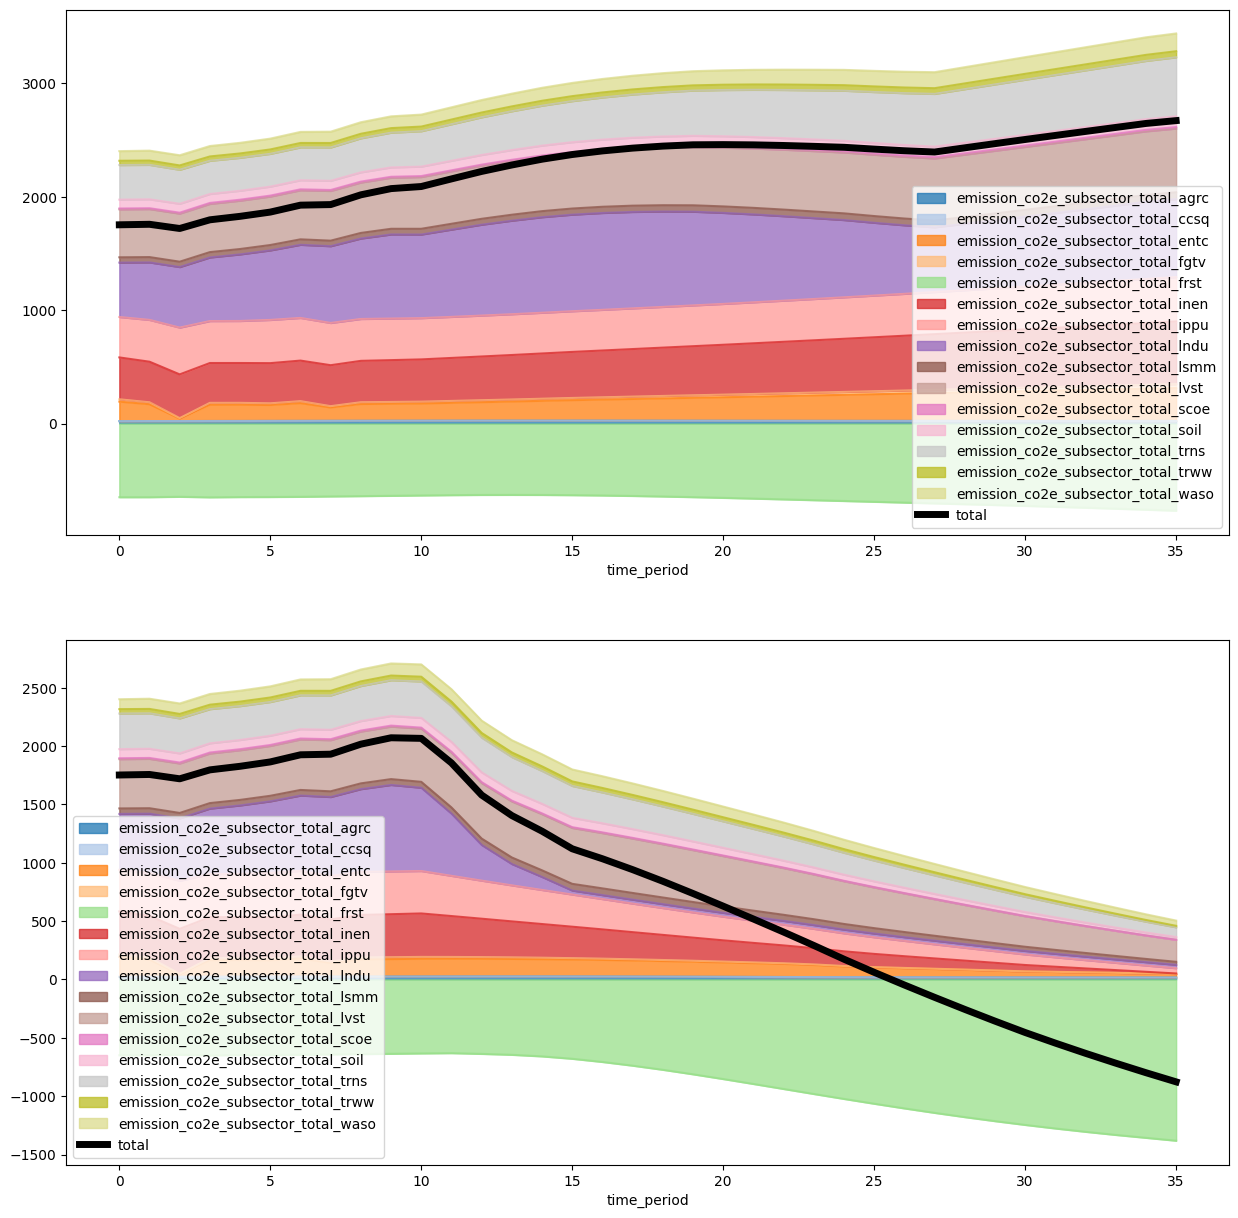

In [47]:

# 3008, 3009, 303
strat_id, strat_id_intervention = 1014, 5008
future_id = 1

# baseline
dict_filt2 = {}
for k in dict_filt.keys():
    val = dict_filt.get(k) if (k != sisepuede.key_strategy) else [strat_id]
    val = [future_id] if (k == sisepuede.key_future) else val
    dict_filt2.update({k: val[0]})

primary_id = sisepuede.odpt_primary.get_key_value(**dict_filt2)
df_filt = df_out[
    df_out[sisepuede.key_primary].isin([primary_id])
]

# intervention
dict_filt_invervention = {}
for k in dict_filt.keys():
    val = dict_filt.get(k) if (k != sisepuede.key_strategy) else [strat_id_intervention]
    val = [future_id] if (k == sisepuede.key_future) else val
    dict_filt_invervention.update({k: val[0]})
primary_id_intervention = sisepuede.odpt_primary.get_key_value(**dict_filt_invervention)
df_filt_intervention = df_out[
    df_out[sisepuede.key_primary].isin([primary_id_intervention])
]


df_in_filt = df_in[
    df_in[sisepuede.key_strategy].isin([strat_id])
]

df_in_filt_intervention = df_in[
    df_in[sisepuede.key_strategy].isin([strat_id_intervention])
]


fig, ax = plt.subplots(2, 1, figsize = (15, 15))
#ax[0].set_ylim(-150, 350)
#ax[0].set_ylim(0, 900)
#ax[1].set_ylim(0, 900)

palette_func = plt.cm.tab20#plt.cm.hsv

flds = [sisepuede.key_time_period]
if False:
    flds += [
        x for x in df_filt.columns 
        if x.startswith("emission_co2e_subsector_total") 
        and (
            False
            or ("ccsq" in x) 
            or ("entc" in x)
            or ("enfu" in x)
            or ("fgtv" in x)
            or ("inen" in x)
            or ("scoe" in x)
            or ("trns" in x)
        )
    ]
    
if False:
    flds += [
        x for x in df_filt.columns 
        if x.startswith("emission_co2e_subsector_total") 
        and (
            #True
            ("agrc" in x)
            or ("frst" in x)
            or ("lndu" in x)
            or ("lsmm" in x)
            or ("lvst" in x)
            or ("soil" in x)
            #("entc" in x) 
            #or ("scoe" in x)
            #or ("lsmm" in x)
            #or ("soil" in x)
            #or ("frst" in x)
            #or ("lndu" in x)
        )
    ]
    
if False:
    flds = [x for x in flds if "trns" in x]
    
if True:
    flds += [
        x for x in df_filt.columns 
        if x.startswith("emission_co2e_") 
        and (
            True
            #and ("lvst" in x)
            #or ("fgtv" in x)
            #and ("subsector_total" not in x)
            and ("subsector_total" in x)
            and 
            (
                True
                #("lvst" in x)
                #or ("lsmm" in x)
                #or ("soil" in x)
            )
        )
    ]

if False:
    flds += [
        x for x in df_filt.columns 
        if x.startswith("energy_demand_enfu_") 
        and (
            True
            #("entc" in x)
            #or ("fgtv" in x)
            #("inen" in x)
            & ("subsector" in x)
            & ("electricity" in x)
        )
    ]

if False:
    #flds = [x for x in df_filt.columns if x.startswith("energy_demand_enfu") and ("total" in x) and ("subsector" not in x)]# and (("natural_gas" in x) or ("crude" in x) or ("electricity" in x) or ("hydrogen" in x))]
    cat = "rail_passenger"
    pre = "energy_consumption_trns"
    fld_ignore = f"{pre}_{cat}"
    flds = [sisepuede.key_time_period] + [x for x in df_filt.columns if x.startswith(pre) and (cat in x) and (x != fld_ignore)]
    #flds = [x for x in df_filt.columns if x.startswith("passenger_distance")]

add_total = True
plot_from_modvar = False

if True:

    # AFOLU
    # modvar_plot = sisepuede.models.model_afolu.modvar_lndu_area_by_cat
    # modvar_plot = sisepuede.models.model_afolu.modvar_lndu_area_converted_from_type
    # modvar_plot = sisepuede.models.model_afolu.modvar_lndu_area_by_cat
    # modvar_plot = sisepuede.models.model_afolu.modvar_soil_emissions_co2_urea
    modvar_plot = sisepuede.models.model_afolu.modvar_lvst_pop
    modvar_plot = sisepuede.models.model_afolu.modvar_lvst_adjusted_equivalent_exports

    # modvar_plot = sisepuede.models.model_afolu.modvar_frst_emissions_co2_sequestration
    # modvar_plot = sisepuede.models.model_afolu.modvar_lndu_emissions_conv
    # modvar_plot = sisepuede.models.model_afolu.modvar_lvst_emissions_ch4_ef
    # modvar_plot = sisepuede.models.model_afolu.modvar_lsmm_emissions_ch4
    
    
    # ENERGY
    #modvar_plot = sisepuede.models.model_electricity.modvar_entc_nemomod_emissions_co2_mne
    modvar_plot = sisepuede.models.model_electricity.modvar_entc_nemomod_production_by_technology
    #modvar_plot = sisepuede.models.model_energy.modvar_trns_energy_consumption_total
    #modvar_plot = sisepuede.models.model_energy.modvar_trns_passenger_distance_traveled
    #modvar_plot = sisepuede.models.model_energy.modvar_trns_passenger_distance_traveled
    #modvar_plot = sisepuede.models.model_energy.modvar_trde_demand_pkm
    #modvar_plot = sisepuede.models.model_energy.modvar_trns_mass_distance_traveled
    #modvar_plot = sisepuede.models.model_energy.modvar_fgtv_emissions_ch4
    #modvar_plot = sisepuede.models.model_energy.modvar_enfu_exports_fuel_adjusted
    #modvar_plot = sisepuede.models.model_energy.modvar_enfu_energy_demand_by_fuel_total
    #modvar_plot = sisepuede.models.model_energy.modvar_enfu_energy_demand_by_fuel_trns
    #modvar_plot = sisepuede.models.model_electricity.modvar_entc_nemomod_production_by_technology
    #modvar_plot = sisepuede.models.model_energy.modvar_fgtv_emissions_ch4
    #modvar_plot = sisepuede.models.model_energy.modvar_trns_vehicle_distance_traveled_electricity
    
    #IPPU
    #modvar_plot = sisepuede.models.model_ippu.modvar_ippu_qty_total_production
    
    
    
    # NO INTERVENTION
    
    df = sisepuede.model_attributes.get_standard_variables(
        df_filt,
        modvar_plot
    )
    df = pd.concat([df_filt[[sisepuede.key_time_period]].reset_index(drop = True), df], axis = 1)
    df = df[[x for x in df.columns if ("nuclear" not in x) and ("crude" not in x)]]
    df = df_filt[flds] if (not plot_from_modvar) else df
    if len(df) > 0:
        for k in df.columns:
            vec = np.array(df[k])
            bnds = (0, np.inf) if (vec[-1] >= 0) else (-np.inf, 0)
            if (max(vec) > 0) and (min(vec) < 0):
                k0 = f"{k}_positive"
                k1 = f"{k}_negative"
                df[k0] = sf.vec_bounds(np.array(df[k]), (0, np.inf))
                df[k1] = sf.vec_bounds(np.array(df[k]), (-np.inf, 0))
                df.drop([k], axis = 1, inplace = True)
            else:
                df[k] = sf.vec_bounds(np.array(df[k]), bnds)
    
    m, n = df.shape
    colors = [palette_func(x/n) for x in range(n)]
    
    alpha = 1 if not add_total else 0.75
    df.plot.area(x = sisepuede.key_time_period, ax = ax[0], color = colors, alpha = alpha)
    if add_total:
        df["total"] = df.drop([sisepuede.key_time_period], axis = 1).sum(axis = 1)
        df[[sisepuede.key_time_period, "total"]].plot(x = sisepuede.key_time_period, ax = ax[0], color = "black", linewidth = 5)
    df_plot_noint = df.copy()
        
        
    # INTERVENTION
    
    df = sisepuede.model_attributes.get_standard_variables(
        df_filt_intervention,
        modvar_plot
    )
    df = pd.concat([df_filt_intervention[[sisepuede.key_time_period]].reset_index(drop = True), df], axis = 1)
    df = df[[x for x in df.columns if ("nuclear" not in x) and ("crude" not in x)]]
    df = df_filt_intervention[flds] if (not plot_from_modvar) else df
    
    if False:
        # UNCOMMENT TO USE DIFF
        vec = np.array(df[sisepuede.key_time_period])
        flds = [x for x in df.columns if (x != sisepuede.key_time_period)]
        df = pd.DataFrame(np.array(df_filt_intervention[flds]) - np.array(df_filt[flds]), columns = flds)
        df[sisepuede.key_time_period] = vec

    
    
    for k in df.columns:
        vec = np.array(df[k])
        bnds = (0, np.inf) if (vec[-1] >= 0) else (-np.inf, 0)
        if (max(vec) > 0) and (min(vec) < 0):
            k0 = f"{k}_positive"
            k1 = f"{k}_negative"
            df[k0] = sf.vec_bounds(np.array(df[k]), (0, np.inf))
            df[k1] = sf.vec_bounds(np.array(df[k]), (-np.inf, 0))
            df.drop([k], axis = 1, inplace = True)
        else:
            df[k] = sf.vec_bounds(np.array(df[k]), bnds)
    
    m, n = df.shape
    colors = [palette_func(x/n) for x in range(n)]
    
    alpha = 1 if not add_total else 0.75
    df.plot.area(x = sisepuede.key_time_period, ax = ax[1], color = colors, alpha = alpha)
    if add_total:
        df["total"] = df.drop([sisepuede.key_time_period], axis = 1).sum(axis = 1)
        df[[sisepuede.key_time_period, "total"]].plot(x = sisepuede.key_time_period, ax = ax[1], color = "black", linewidth = 5)
    df_plot_int = df.copy()
    #df.plot(ax = ax[1], color = colors)



In [18]:
#df_in_filt[[x for x in df_in_filt.columns if x.startswith("exports_lvst")]]
df_filt[[x for x in df_filt.columns if x.startswith("emission_co2e_subsector")]].tail().sum(axis = 1)

31    3292.424960
32    3349.195064
33    3405.958095
34    3462.737743
35    3497.690592
dtype: float64

In [19]:
#df_filt[[x for x in df_filt.columns if ("emission_co2e" in x) & ("frst" in x)]]

In [20]:
area = 196437500
0.0006*0.38*area

44787.75

In [45]:
df_filt[
    [x for x in df_filt.columns if ("emission_co2e_co2" in x) and ("metal" in x)]
].tail().sum(axis = 1)

2551    174.267899
2552    178.834690
2553    183.280485
2554    187.601053
2555    191.792604
dtype: float64

In [54]:
sa.model_attributes.get_standard_variables(
    df_filt,
    model_afolu.modvar_lndu_area_converted_from_type
).head()

,area_lndu_conversion_from_croplands,area_lndu_conversion_from_forests_mangroves,area_lndu_conversion_from_forests_primary,area_lndu_conversion_from_forests_secondary,area_lndu_conversion_from_grasslands,area_lndu_conversion_from_other,area_lndu_conversion_from_settlements,area_lndu_conversion_from_wetlands
0,34259.528106,1290.749926,1.046884e+06,143.758774,139029.789638,10351.816780,1665.974155,5988.452273
1,34737.660993,1387.556829,1.053775e+06,226.819061,140721.691235,11502.495387,1813.990762,6188.327866
2,35215.960720,1488.422663,1.059969e+06,312.865803,142419.581860,12694.055942,1964.014433,6386.192557
3,35690.757330,1593.393318,1.065468e+06,401.646669,144123.231522,13924.976806,2115.686503,6581.985642
4,36158.226832,1702.510773,1.070278e+06,492.909864,145832.664332,15193.738765,2268.660211,6775.649455


In [50]:
sa.model_attributes.get_standard_variables(
    df_filt_intervention,
    model_afolu.modvar_lndu_area_converted_to_type
).tail()

,area_lndu_conversion_to_croplands,area_lndu_conversion_to_forests_mangroves,area_lndu_conversion_to_forests_primary,area_lndu_conversion_to_forests_secondary,area_lndu_conversion_to_grasslands,area_lndu_conversion_to_other,area_lndu_conversion_to_settlements,area_lndu_conversion_to_wetlands
31,157357.062645,37970.044233,0.0,1.097878e+06,2541.747847,63277.246174,838.109221,0.0
32,153095.345389,37938.279233,0.0,1.040758e+06,2624.657364,47784.764492,474.779753,0.0
33,148612.159926,37884.350339,0.0,9.809019e+05,2711.027314,32351.521687,214.253740,0.0
34,143942.036712,37805.697454,0.0,9.197510e+05,2796.984229,16964.996037,56.339077,0.0
35,142520.597925,37955.452220,0.0,9.058818e+05,2808.063557,16960.071252,56.322722,0.0


In [44]:
df_filt_intervention[
    [x for x in df_filt_intervention.columns if ("emission_co2e_co2" in x) and ("metal" in x)]
].tail().sum(axis = 1)

2731    58.191944
2732    56.074297
2733    53.874267
2734    51.603679
2735    49.274082
dtype: float64

In [41]:
df_filt[
    [x for x in df_filt.columns if ("emission_co2e" in x) and ("metal" in x)]
].sum(axis = 1)

2520     66.733555
2521     62.952373
2522     64.726351
2523     68.608067
2524     70.595169
2525     72.326768
2526     74.194818
2527     76.067225
2528     77.930395
2529     79.782779
2530     81.622862
2531     85.791599
2532     89.976830
2533     94.171132
2534     98.367276
2535    102.558248
2536    107.067163
2537    111.561497
2538    116.033872
2539    120.477204
2540    124.884707
2541    129.532077
2542    134.131095
2543    138.675092
2544    143.157754
2545    147.573127
2546    152.303259
2547    156.951171
2548    161.511015
2549    165.977362
2550    170.345187
2551    175.049285
2552    179.636553
2553    184.102282
2554    188.442222
2555    192.652568
dtype: float64